<a href="https://colab.research.google.com/github/danielahernandz/Series-de-tiempo-avanzado/blob/main/WhiteNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como se genera ruido blanco 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set() 

In [4]:
#Loading and transforming the Data
data = pd.read_csv("Index2018.csv")
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst= True) #formato inicio con dia
df.set_index("date", inplace= True) #indice fecha
df = df.asfreq('b') #bussinnes days
df= df.fillna(method='ffill') #periodo posterior

In [5]:
df['market_value']= df.spx

In [6]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

In [7]:
size= int(len(df)*0.8)
df_, df_test = df.iloc[:size], df.iloc[size:]

White Noise / Ruido Blanco

In [8]:
#Generando ruido blanco o seq aleatoria con: loc(localización representativa=media), escala=desviacion, size=tamaño
wn = np.random.normal(loc = df_.market_value.mean(), scale = df_.market_value.std(), size= len(df_))

In [9]:
#Add columna de ruido blanco
df_['wn'] = wn 

<ipython-input-9-0743ecb8d467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['wn'] = wn


In [10]:
df_.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1098.643663
std,292.559287,290.545627
min,438.920000,100.105157
25%,914.620000,894.563625
50%,1144.650000,1096.647253
75%,1316.280729,1303.450511
max,1570.252238,2118.729389


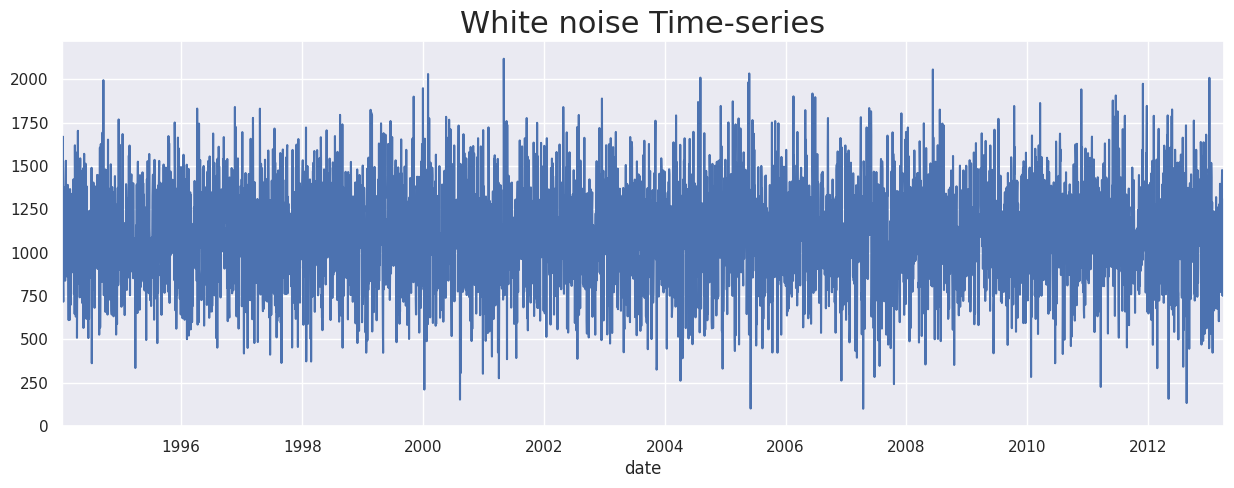

In [11]:
df_.wn.plot(figsize=(15,5))
plt.title("White noise Time-series", size=22)
plt.show()

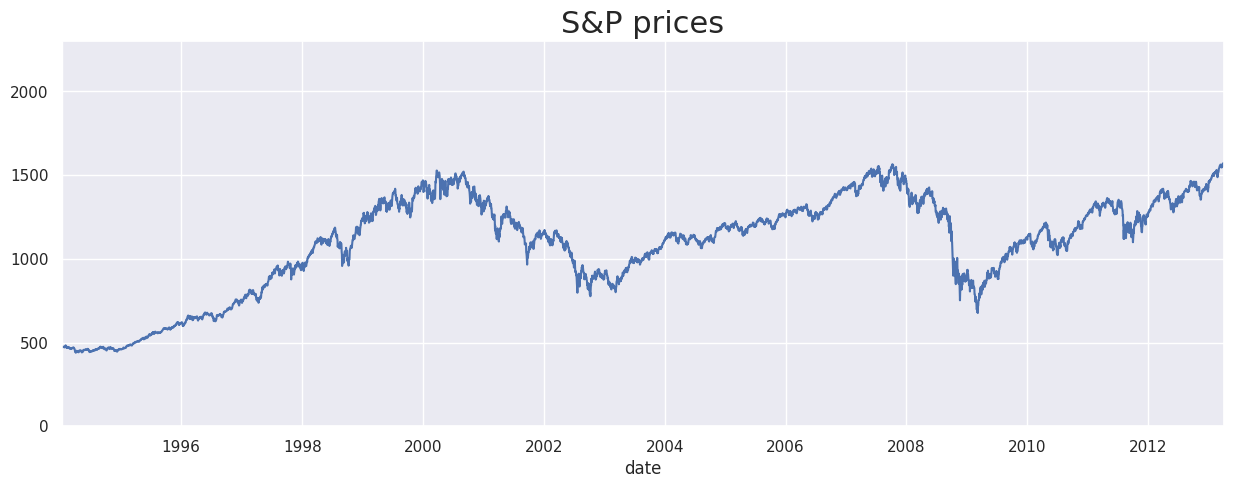

In [13]:
df_.market_value.plot(figsize=(15,5))
plt.title("S&P prices", size=22)
plt.ylim(0,2300) #Para que puedan ser comparables en escalas antes ($400-1600$ =! 0-2000 wn)
plt.show()